In [1]:
import os
import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import ZeroPadding2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten, Dropout
from keras.layers.core import Dense
from keras.datasets import cifar10
from keras.optimizers import RMSprop
from keras.optimizers import Nadam
from keras.callbacks import TensorBoard, ModelCheckpoint
from keras.utils import plot_model

from keras.callbacks import CSVLogger

import tensorflow as tf

Using TensorFlow backend.


In [2]:
def network(input_shape, num_classes):
    model = Sequential()
    # extract image features by convolution and max pooling layers
    model.add(Conv2D(
        32, kernel_size=3, padding="same",
        input_shape=input_shape, activation="relu"
        ))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(64, kernel_size=3, padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # classify the class by fully-connected layers
    model.add(Flatten())
    model.add(Dense(512, activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation(tf.nn.softmax))
    return model

# dropout1 0.25 -> 0.5
def network_do05(input_shape, num_classes):
    model = Sequential()
    # extract image features by convolution and max pooling layers
    model.add(Conv2D(
        32, kernel_size=3, padding="same",
        input_shape=input_shape, activation="relu"
        ))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))
    model.add(Conv2D(64, kernel_size=3, padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # classify the class by fully-connected layers
    model.add(Flatten())
    model.add(Dense(512, activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation(tf.nn.softmax))
    return model

# added dropout layer
def network_addDO(input_shape, num_classes):
    model = Sequential()
    # extract image features by convolution and max pooling layers
    model.add(Conv2D(
        32, kernel_size=3, padding="same",
        input_shape=input_shape, activation="relu"
        ))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(64, kernel_size=3, padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    # classify the class by fully-connected layers
    model.add(Flatten())
    model.add(Dense(512, activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation(tf.nn.softmax))
    return model

# changed output size on conv
def network_Conv64(input_shape, num_classes):
    model = Sequential()
    # extract image features by convolution and max pooling layers
    model.add(Conv2D(
        64, kernel_size=3, padding="same",
        input_shape=input_shape, activation="relu"
        ))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(128, kernel_size=3, padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # classify the class by fully-connected layers
    model.add(Flatten())
    model.add(Dense(512, activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation(tf.nn.softmax))
    return model

# added convolutional layer
def network_addConv(input_shape, num_classes):
    model = Sequential()
    # extract image features by convolution and max pooling layers
    model.add(Conv2D(
        32, kernel_size=3, padding="same",
        input_shape=input_shape, activation="relu"
        ))
    model.add(Conv2D(
        32, kernel_size=3, padding="same",
        input_shape=input_shape, activation="relu"
    ))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(64, kernel_size=3, padding="same", activation="relu"))
    model.add(Conv2D(64, kernel_size=3, padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # classify the class by fully-connected layers
    model.add(Flatten())
    model.add(Dense(512, activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation(tf.nn.softmax))
    return model

# changed output size on conv
def network_Conv64_addDO(input_shape, num_classes):
    model = Sequential()
    # extract image features by convolution and max pooling layers
    model.add(Conv2D(
        64, kernel_size=3, padding="same",
        input_shape=input_shape, activation="relu"
        ))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(128, kernel_size=3, padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    # classify the class by fully-connected layers
    model.add(Flatten())
    model.add(Dense(512, activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation(tf.nn.softmax))
    return model

# added convolutional layer
def network_addConv_addDO(input_shape, num_classes):
    model = Sequential()
    # extract image features by convolution and max pooling layers
    model.add(Conv2D(
        32, kernel_size=3, padding="same",
        input_shape=input_shape, activation="relu"
        ))
    model.add(Conv2D(
        32, kernel_size=3, padding="same",
        input_shape=input_shape, activation="relu"
    ))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(64, kernel_size=3, padding="same", activation="relu"))
    model.add(Conv2D(64, kernel_size=3, padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    # classify the class by fully-connected layers
    model.add(Flatten())
    model.add(Dense(512, activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation(tf.nn.softmax))
    return model

In [3]:
class CIFAR10Dataset():
    def __init__(self):
        self.image_shape = (32, 32, 3)
        self.num_classes = 10
    def get_batch(self):
        (x_train, y_train), (x_test, y_test) = cifar10.load_data()
        x_train, x_test = [self.preprocess(d) for d in [x_train, x_test]]
        y_train, y_test = [self.preprocess(d, label_data=True) for d in [y_train, y_test]]
        return x_train, y_train, x_test, y_test
    def preprocess(self, data, label_data=False):
        if label_data:
            # convert class vectors to binary class matrices
            data = keras.utils.to_categorical(data, self.num_classes)
        else:
            data = data.astype("float32")
            data /= 255  # convert the value to 0~1 scale
            shape = (data.shape[0],) + self.image_shape  # add dataset length
            data = data.reshape(shape)
        return data

In [4]:
class Trainer():
    def __init__(self, model, loss, optimizer, label):
        self.label = label
        self._target = model
        self._target.compile( loss=loss, optimizer=optimizer, metrics=["accuracy"] )
        self.verbose = 1
        self.csv_logger = CSVLogger(label+'.csv', append=False, separator=';')
        logdir = label + "_cifar10_net"
        self.log_dir = os.path.join(os.path.dirname("__file__"), logdir)
        self.model_file_name = "model_file.hdf5"
        self.tensorboard = keras.callbacks.TensorBoard(log_dir=logdir)
        plot_model(model, to_file=label+'_model.png', show_shapes=True, show_layer_names=True) #, expand_nested=True)
        
    def train(self, x_train, y_train, batch_size, epochs, validation_split):
        if os.path.exists(self.log_dir):
            import shutil
            shutil.rmtree(self.log_dir)  # remove previous execution
        os.mkdir(self.log_dir)
        model_path = os.path.join(self.log_dir, self.model_file_name)
        self._target.fit(
            x_train, y_train,
            batch_size=batch_size, epochs=epochs,
            validation_split=validation_split,
            callbacks=[ TensorBoard(log_dir=self.log_dir), ModelCheckpoint(model_path,save_best_only=True), self.csv_logger, self.tensorboard ],
            verbose=self.verbose
        )

In [5]:
class Score:
    class Param:
        def __init__(self, label, data):
            self.label = label
            self.data = data
    
    def __init__(self, name, csvfile):
        self.name = name
        self.epoch = None
        self.acc = None
        self.loss = None
        self.val_loss = None
        self.val_accu = None
        self.read_csv(csvfile)
        
    def read_csv(self, filename):
        df = pd.read_csv(filename,sep=";")
        self.epoch = self.Param('epoch', df['epoch'].values)
        self.acc = self.Param('acc', df['acc'].values)
        self.loss = self.Param('loss', df['loss'].values)
        self.val_loss = self.Param('val_loss', df['val_loss'].values)
        self.val_acc = self.Param('val_acc', df['val_acc'].values)

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use(['science', 'notebook'])
%matplotlib inline

def plot_score(score):
    epoch = score.epoch.data+1
    loss = score.loss.data
    acc = score.acc.data
    val_loss = score.val_loss.data
    val_acc = score.val_acc.data

    xsize = 8 + 8 * ( (len(epoch)-1) // 10 )
    fig, axes = plt.subplots(figsize=[xsize, 6])
    if ((len(epoch)-1) // 10) > 0:
        axes.axvspan(10, 20, color="yellow", alpha=0.2)
    axes.plot(epoch, loss, label='loss')
    axes.text(epoch[-1],loss[-1], str(loss[-1]), ha='right')
    axes.plot(epoch,val_loss, label='val_loss')
    axes.text(epoch[-1],val_loss[-1], str(val_loss[-1]), ha='right')
    axes.legend(loc=(0.02, 0.16))
    axes.set_xlabel('epoch')
    axes.set_ylabel('loss')

    ax2 = axes.twinx()
    ax2.grid(alpha=0.3)
    ax2.plot(epoch,acc, label='acc',color='r')
    ax2.text(epoch[-1],acc[-1], str(acc[-1]), ha='right')
    ax2.plot(epoch,val_acc, label='val_acc',color='orange')
    ax2.text(epoch[-1],val_acc[-1], str(val_acc[-1]), ha='right')
    ax2.set_ylim([0,1])
    l = ax2.legend(loc=(0.02, 0.02))
    #for text in l.get_texts():
    #    text.set_color('r')
    ax2.set_ylabel('accuracy')#, color='r')
    ax2.tick_params(axis='y')#, colors='r')
        
    plt.title(score.name)
    plt.savefig(score.name+'_score.png')
    plt.show()
#df.plot(x=label+'_epoch',y=[label+'_loss',label+'_val_loss,ylim=[0,2],grid=True)

# show result
def show_result(model):
    score = model.evaluate(x_test, y_test, verbose=0)
    with open(trainer.label+'_result.txt', 'w') as f:
        f.write("Test loss:" + str(score[0])+'\n')
        f.write("Test accuracy:" + str(score[1])+'\n')    
    print("Test loss:", score[0])
    print("Test accuracy:", score[1])

In [7]:
dataset = CIFAR10Dataset()
# train the model
x_train, y_train, x_test, y_test = dataset.get_batch()

# 学習

In [8]:
label = 'test'
# train
model = network(dataset.image_shape, dataset.num_classes)
trainer = Trainer(model, loss="categorical_crossentropy", optimizer=RMSprop(), label=label)
trainer.train(
    x_train, y_train, batch_size=128, epochs=2, validation_split=0.2
    )

Train on 40000 samples, validate on 10000 samples
Epoch 1/2
40000/40000 [==============================] - 37s 916us/step - loss: 1.7002 - acc: 0.3921 - val_loss: 1.4749 - val_acc: 0.4709
Epoch 2/2
40000/40000 [==============================] - 37s 919us/step - loss: 1.2872 - acc: 0.5433 - val_loss: 1.2726 - val_acc: 0.5608


Test loss: 1.2652178955078126
Test accuracy: 0.5623


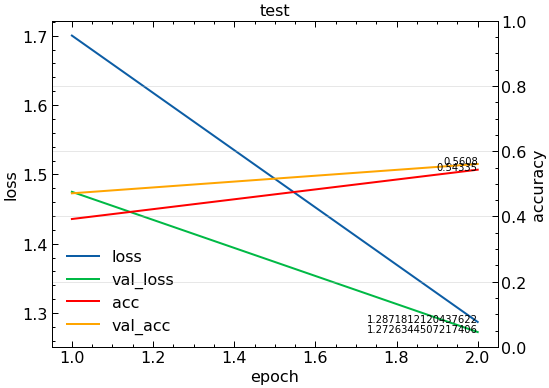

In [9]:
# show
show_result(model)
plot_score(Score(trainer.label,trainer.label + ".csv"))

In [10]:
label = 'NoChanged'
# train
model = network(dataset.image_shape, dataset.num_classes)
trainer = Trainer(model, loss="categorical_crossentropy", optimizer=RMSprop(), label=label)
trainer.train(
    x_train, y_train, batch_size=128, epochs=10, validation_split=0.2
    )

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 37s 921us/step - loss: 1.7271 - acc: 0.3771 - val_loss: 1.4732 - val_acc: 0.4654
Epoch 2/10
40000/40000 [==============================] - 37s 916us/step - loss: 1.3114 - acc: 0.5356 - val_loss: 1.2348 - val_acc: 0.5727
Epoch 3/10
40000/40000 [==============================] - 37s 918us/step - loss: 1.1423 - acc: 0.5988 - val_loss: 1.0421 - val_acc: 0.6382
Epoch 4/10
40000/40000 [==============================] - 37s 919us/step - loss: 1.0353 - acc: 0.6365 - val_loss: 0.9730 - val_acc: 0.6589
Epoch 5/10
40000/40000 [==============================] - 37s 918us/step - loss: 0.9482 - acc: 0.6666 - val_loss: 0.9927 - val_acc: 0.6534
Epoch 6/10
40000/40000 [==============================] - 37s 920us/step - loss: 0.8834 - acc: 0.6907 - val_loss: 1.0015 - val_acc: 0.6541
Epoch 7/10
40000/40000 [==============================] - 37s 924us/step - loss: 0.8220 - acc: 0.7138 - val_loss: 0.

Test loss: 0.9030652490615845
Test accuracy: 0.7055


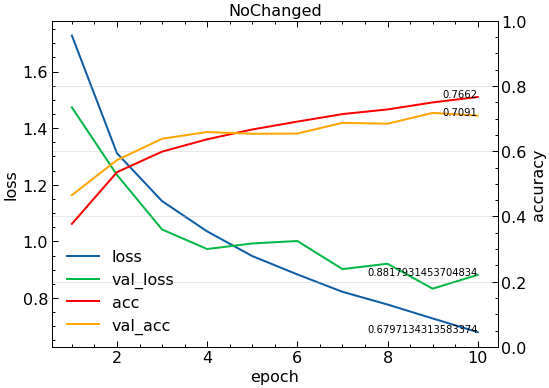

In [11]:
# show
show_result(model)
plot_score(Score(trainer.label,trainer.label + ".csv"))

In [12]:
label = 'Epoch20'
# train
model = network(dataset.image_shape, dataset.num_classes)
trainer = Trainer(model, loss="categorical_crossentropy", optimizer=RMSprop(), label=label)
trainer.train(
    x_train, y_train, batch_size=128, epochs=20, validation_split=0.2
    )

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 37s 932us/step - loss: 1.7302 - acc: 0.3769 - val_loss: 1.3539 - val_acc: 0.5306
Epoch 2/20
40000/40000 [==============================] - 37s 924us/step - loss: 1.3156 - acc: 0.5318 - val_loss: 1.2122 - val_acc: 0.5940
Epoch 3/20
40000/40000 [==============================] - 37s 925us/step - loss: 1.1465 - acc: 0.5940 - val_loss: 1.0545 - val_acc: 0.6362
Epoch 4/20
40000/40000 [==============================] - 37s 925us/step - loss: 1.0443 - acc: 0.6360 - val_loss: 0.9921 - val_acc: 0.6565
Epoch 5/20
40000/40000 [==============================] - 37s 920us/step - loss: 0.9551 - acc: 0.6649 - val_loss: 1.0067 - val_acc: 0.6537
Epoch 6/20
40000/40000 [==============================] - 37s 925us/step - loss: 0.8933 - acc: 0.6877 - val_loss: 0.8922 - val_acc: 0.6922
Epoch 7/20
40000/40000 [==============================] - 37s 922us/step - loss: 0.8337 - acc: 0.7090 - val_loss: 0.

Test loss: 0.9008321866035461
Test accuracy: 0.7253


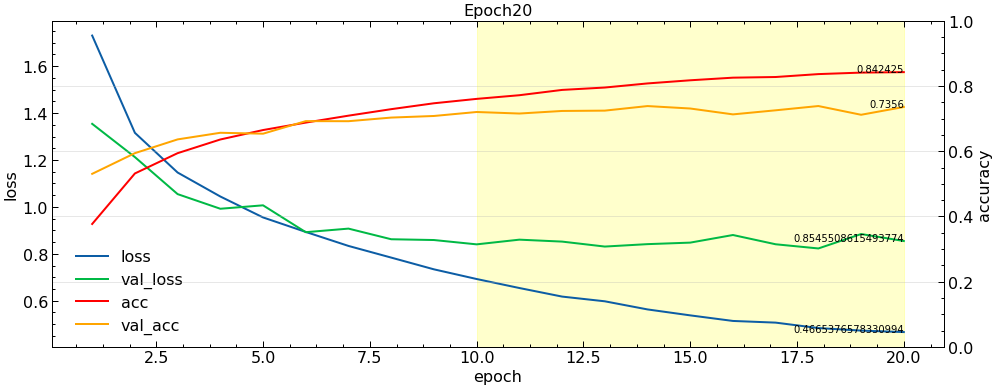

In [13]:
# show
show_result(model)
plot_score(Score(trainer.label,trainer.label + ".csv"))

In [14]:
label = 'Epoch20_DropOut05'
# train
model = network_do05(dataset.image_shape, dataset.num_classes)
trainer = Trainer(model, loss="categorical_crossentropy", optimizer=RMSprop(), label=label)
trainer.train(
    x_train, y_train, batch_size=128, epochs=20, validation_split=0.2
    )

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 37s 927us/step - loss: 1.8718 - acc: 0.3328 - val_loss: 1.5503 - val_acc: 0.4797
Epoch 2/20
40000/40000 [==============================] - 37s 920us/step - loss: 1.4378 - acc: 0.4893 - val_loss: 1.3270 - val_acc: 0.5567
Epoch 3/20
40000/40000 [==============================] - 37s 919us/step - loss: 1.2742 - acc: 0.5483 - val_loss: 1.1931 - val_acc: 0.5873
Epoch 4/20
40000/40000 [==============================] - 37s 919us/step - loss: 1.1624 - acc: 0.5893 - val_loss: 1.1639 - val_acc: 0.5977
Epoch 5/20
40000/40000 [==============================] - 37s 921us/step - loss: 1.0853 - acc: 0.6180 - val_loss: 1.0523 - val_acc: 0.6315
Epoch 6/20
40000/40000 [==============================] - 37s 921us/step - loss: 1.0254 - acc: 0.6427 - val_loss: 0.9796 - val_acc: 0.6573
Epoch 7/20
40000/40000 [==============================] - 37s 920us/step - loss: 0.9743 - acc: 0.6588 - val_loss: 0.

Test loss: 0.8720340171813965
Test accuracy: 0.7073


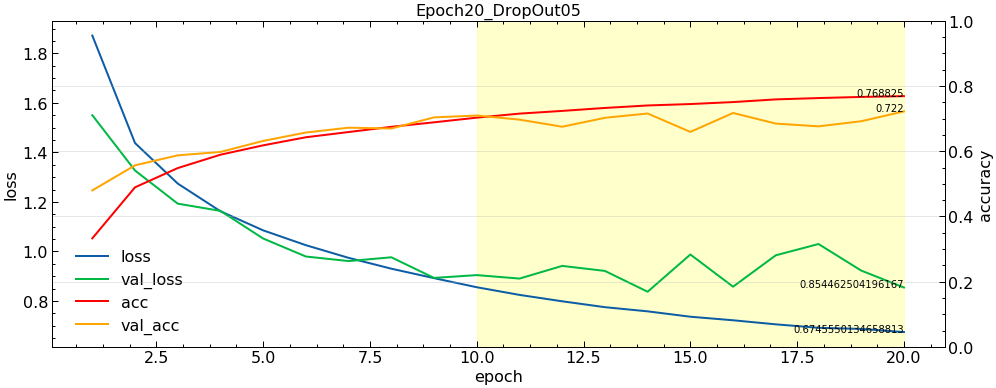

In [15]:
# show
show_result(model)
plot_score(Score(trainer.label,trainer.label + ".csv"))

In [16]:
label = 'Epoch20_addDropOutLayer'
# train
model = network_addDO(dataset.image_shape, dataset.num_classes)
trainer = Trainer(model, loss="categorical_crossentropy", optimizer=RMSprop(), label=label)
trainer.train(
    x_train, y_train, batch_size=128, epochs=20, validation_split=0.2
    )

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 38s 958us/step - loss: 1.7392 - acc: 0.3740 - val_loss: 1.4497 - val_acc: 0.4999
Epoch 2/20
40000/40000 [==============================] - 38s 950us/step - loss: 1.3426 - acc: 0.5233 - val_loss: 1.2462 - val_acc: 0.5598
Epoch 3/20
40000/40000 [==============================] - 38s 952us/step - loss: 1.1895 - acc: 0.5802 - val_loss: 1.1218 - val_acc: 0.6117
Epoch 4/20
40000/40000 [==============================] - 38s 949us/step - loss: 1.0894 - acc: 0.6167 - val_loss: 1.0104 - val_acc: 0.6579
Epoch 5/20
40000/40000 [==============================] - 38s 953us/step - loss: 1.0271 - acc: 0.6405 - val_loss: 0.9631 - val_acc: 0.6661
Epoch 6/20
40000/40000 [==============================] - 38s 953us/step - loss: 0.9673 - acc: 0.6609 - val_loss: 1.0065 - val_acc: 0.6440
Epoch 7/20
40000/40000 [==============================] - 38s 951us/step - loss: 0.9211 - acc: 0.6771 - val_loss: 0.

Test loss: 0.7896506719589234
Test accuracy: 0.7387


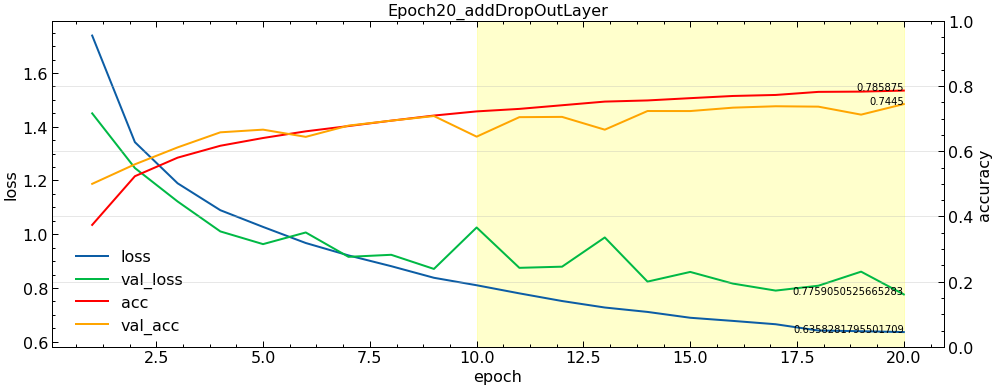

In [17]:
# show
show_result(model)
plot_score(Score(trainer.label,trainer.label + ".csv"))

In [18]:
label = 'Epoch20_Convolution64'
# train
model = network_Conv64(dataset.image_shape, dataset.num_classes)
trainer = Trainer(model, loss="categorical_crossentropy", optimizer=RMSprop(), label=label)
trainer.train(
    x_train, y_train, batch_size=128, epochs=20, validation_split=0.2
    )

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 87s 2ms/step - loss: 1.7312 - acc: 0.3871 - val_loss: 1.3194 - val_acc: 0.5296
Epoch 2/20
40000/40000 [==============================] - 87s 2ms/step - loss: 1.2458 - acc: 0.5618 - val_loss: 1.0882 - val_acc: 0.6188
Epoch 3/20
40000/40000 [==============================] - 87s 2ms/step - loss: 1.0632 - acc: 0.6280 - val_loss: 0.9650 - val_acc: 0.6665
Epoch 4/20
40000/40000 [==============================] - 87s 2ms/step - loss: 0.9440 - acc: 0.6700 - val_loss: 1.0390 - val_acc: 0.6504
Epoch 5/20
40000/40000 [==============================] - 87s 2ms/step - loss: 0.8450 - acc: 0.7077 - val_loss: 0.8921 - val_acc: 0.6972
Epoch 6/20
40000/40000 [==============================] - 87s 2ms/step - loss: 0.7710 - acc: 0.7321 - val_loss: 0.8555 - val_acc: 0.7106
Epoch 7/20
40000/40000 [==============================] - 87s 2ms/step - loss: 0.6967 - acc: 0.7570 - val_loss: 0.8825 - val_acc

Test loss: 0.9541256335258483
Test accuracy: 0.7087


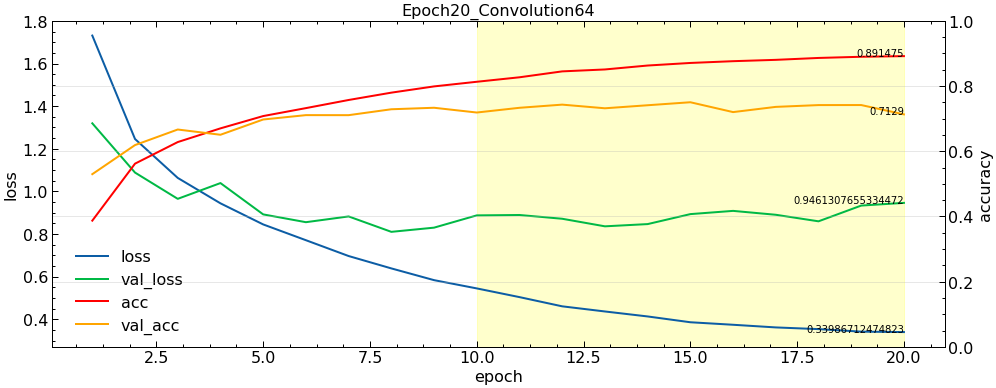

In [19]:
# show
show_result(model)
plot_score(Score(trainer.label,trainer.label + ".csv"))

In [20]:
label = 'Epoch20_AddConv'
# train
model = network_addConv(dataset.image_shape, dataset.num_classes)
trainer = Trainer(model, loss="categorical_crossentropy", optimizer=RMSprop(), label=label)
trainer.train(
    x_train, y_train, batch_size=128, epochs=20, validation_split=0.2
    )

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 93s 2ms/step - loss: 1.8019 - acc: 0.3486 - val_loss: 1.4580 - val_acc: 0.4648
Epoch 2/20
40000/40000 [==============================] - 92s 2ms/step - loss: 1.3108 - acc: 0.5355 - val_loss: 1.1965 - val_acc: 0.5725
Epoch 3/20
40000/40000 [==============================] - 92s 2ms/step - loss: 1.0783 - acc: 0.6223 - val_loss: 1.0308 - val_acc: 0.6369
Epoch 4/20
40000/40000 [==============================] - 92s 2ms/step - loss: 0.9278 - acc: 0.6749 - val_loss: 0.8969 - val_acc: 0.6849
Epoch 5/20
40000/40000 [==============================] - 94s 2ms/step - loss: 0.8246 - acc: 0.7121 - val_loss: 0.9271 - val_acc: 0.6799
Epoch 6/20
40000/40000 [==============================] - 93s 2ms/step - loss: 0.7446 - acc: 0.7410 - val_loss: 0.9131 - val_acc: 0.6921
Epoch 7/20
40000/40000 [==============================] - 93s 2ms/step - loss: 0.6702 - acc: 0.7666 - val_loss: 0.8275 - val_acc

Test loss: 0.8948430205345154
Test accuracy: 0.7597


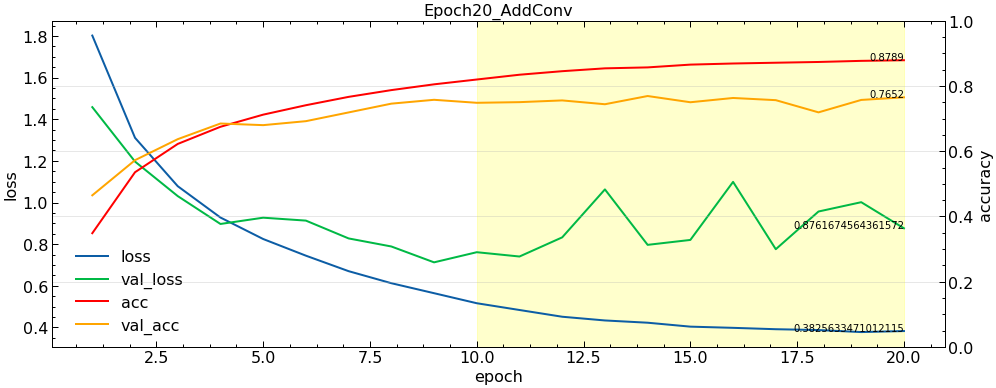

In [21]:
# show
show_result(model)
plot_score(Score(trainer.label,trainer.label + ".csv"))

In [23]:
label = 'Epoch20_Convolution64_Nadam'
# train
model = network_Conv64(dataset.image_shape, dataset.num_classes)
trainer = Trainer(model, loss="categorical_crossentropy", optimizer=Nadam(), label=label)
trainer.train(
    x_train, y_train, batch_size=128, epochs=20, validation_split=0.2
    )

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 95s 2ms/step - loss: 1.6862 - acc: 0.3973 - val_loss: 1.3163 - val_acc: 0.5274
Epoch 2/20
40000/40000 [==============================] - 92s 2ms/step - loss: 1.1964 - acc: 0.5738 - val_loss: 1.0749 - val_acc: 0.6240
Epoch 3/20
40000/40000 [==============================] - 92s 2ms/step - loss: 1.0040 - acc: 0.6438 - val_loss: 1.1794 - val_acc: 0.5824
Epoch 4/20
40000/40000 [==============================] - 92s 2ms/step - loss: 0.8848 - acc: 0.6892 - val_loss: 0.9218 - val_acc: 0.6857
Epoch 5/20
40000/40000 [==============================] - 92s 2ms/step - loss: 0.7878 - acc: 0.7241 - val_loss: 0.8341 - val_acc: 0.7139
Epoch 6/20
40000/40000 [==============================] - 92s 2ms/step - loss: 0.7022 - acc: 0.7538 - val_loss: 0.8414 - val_acc: 0.7115
Epoch 7/20
40000/40000 [==============================] - 92s 2ms/step - loss: 0.6209 - acc: 0.7802 - val_loss: 0.8164 - val_acc

Test loss: 1.2317955401420593
Test accuracy: 0.7249


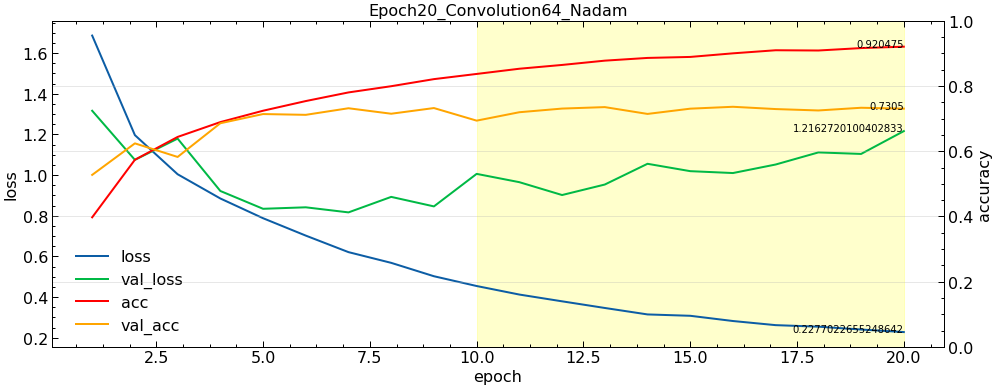

In [24]:
# show
show_result(model)
plot_score(Score(trainer.label,trainer.label + ".csv"))

In [35]:
label = 'Epoch20_addConv_Nadam'
# train
model = network_addConv(dataset.image_shape, dataset.num_classes)
trainer = Trainer(model, loss="categorical_crossentropy", optimizer=Nadam(), label=label)
trainer.train(
    x_train, y_train, batch_size=128, epochs=20, validation_split=0.2
    )

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 95s 2ms/step - loss: 1.8321 - acc: 0.3393 - val_loss: 1.4557 - val_acc: 0.4685
Epoch 2/20
40000/40000 [==============================] - 94s 2ms/step - loss: 1.2521 - acc: 0.5530 - val_loss: 1.0636 - val_acc: 0.6190
Epoch 3/20
40000/40000 [==============================] - 94s 2ms/step - loss: 0.9955 - acc: 0.6494 - val_loss: 0.8585 - val_acc: 0.6965
Epoch 4/20
40000/40000 [==============================] - 95s 2ms/step - loss: 0.8515 - acc: 0.7007 - val_loss: 0.8657 - val_acc: 0.6939
Epoch 5/20
40000/40000 [==============================] - 95s 2ms/step - loss: 0.7396 - acc: 0.7380 - val_loss: 0.8189 - val_acc: 0.7270
Epoch 6/20
40000/40000 [==============================] - 95s 2ms/step - loss: 0.6489 - acc: 0.7710 - val_loss: 0.7675 - val_acc: 0.7508
Epoch 7/20
40000/40000 [==============================] - 95s 2ms/step - loss: 0.5747 - acc: 0.7967 - val_loss: 0.7481 - val_acc

Test loss: 1.0403824743747712
Test accuracy: 0.7566


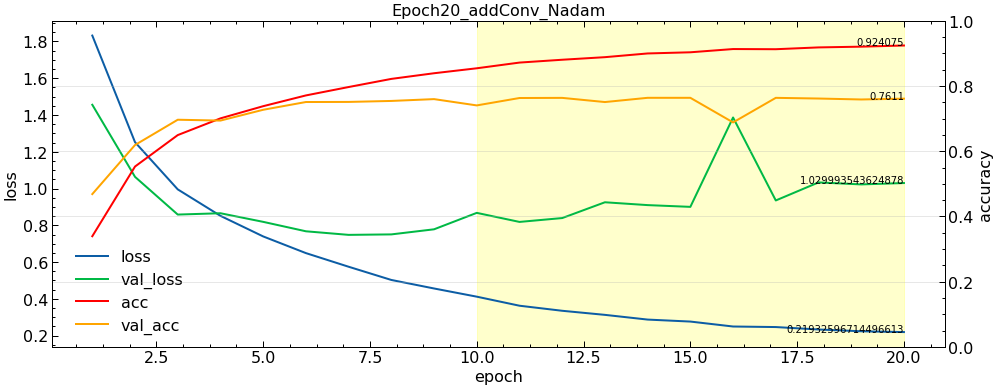

In [36]:
# show
show_result(model)
plot_score(Score(trainer.label,trainer.label + ".csv"))

In [25]:
label = 'Epoch20_Convolution64_lr0002'
# train
model = network_Conv64(dataset.image_shape, dataset.num_classes)
trainer = Trainer(model, loss="categorical_crossentropy", optimizer=RMSprop(lr=0.002), label=label)
trainer.train(
    x_train, y_train, batch_size=128, epochs=20, validation_split=0.2
    )

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 87s 2ms/step - loss: 1.8253 - acc: 0.3565 - val_loss: 2.0194 - val_acc: 0.3551
Epoch 2/20
40000/40000 [==============================] - 86s 2ms/step - loss: 1.3045 - acc: 0.5404 - val_loss: 1.1546 - val_acc: 0.5956
Epoch 3/20
40000/40000 [==============================] - 86s 2ms/step - loss: 1.1289 - acc: 0.6082 - val_loss: 1.0309 - val_acc: 0.6379
Epoch 4/20
40000/40000 [==============================] - 86s 2ms/step - loss: 1.0085 - acc: 0.6490 - val_loss: 1.1527 - val_acc: 0.6218
Epoch 5/20
40000/40000 [==============================] - 86s 2ms/step - loss: 0.9189 - acc: 0.6847 - val_loss: 0.9625 - val_acc: 0.6747
Epoch 6/20
40000/40000 [==============================] - 87s 2ms/step - loss: 0.8530 - acc: 0.7074 - val_loss: 1.1168 - val_acc: 0.6352
Epoch 7/20
40000/40000 [==============================] - 87s 2ms/step - loss: 0.7960 - acc: 0.7283 - val_loss: 0.9741 - val_acc

Test loss: 1.070128890991211
Test accuracy: 0.6699


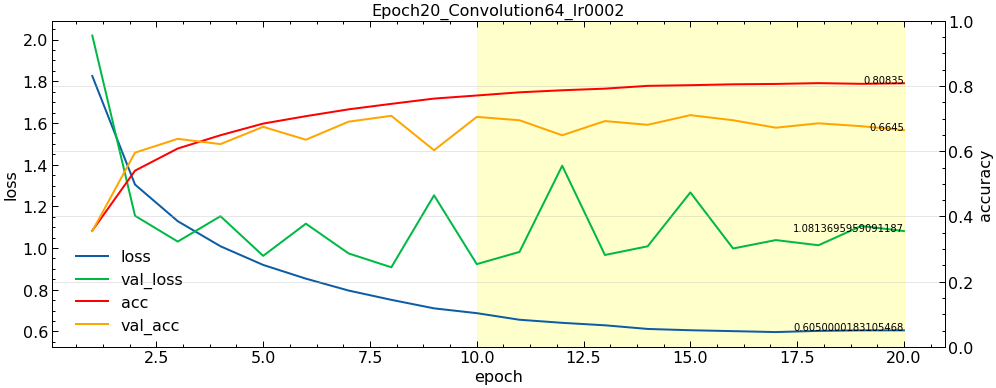

In [26]:
# show
show_result(model)
plot_score(Score(trainer.label,trainer.label + ".csv"))

In [27]:
label = 'Epoch20_Convolution64_Nadam_addDropOut'
# train
model = network_Conv64_addDO(dataset.image_shape, dataset.num_classes)
trainer = Trainer(model, loss="categorical_crossentropy", optimizer=Nadam(), label=label)
trainer.train(
    x_train, y_train, batch_size=128, epochs=20, validation_split=0.2
    )

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 95s 2ms/step - loss: 1.7108 - acc: 0.3855 - val_loss: 1.2766 - val_acc: 0.5506
Epoch 2/20
40000/40000 [==============================] - 94s 2ms/step - loss: 1.2249 - acc: 0.5662 - val_loss: 1.0522 - val_acc: 0.6420
Epoch 3/20
40000/40000 [==============================] - 94s 2ms/step - loss: 1.0565 - acc: 0.6298 - val_loss: 0.9496 - val_acc: 0.6665
Epoch 4/20
40000/40000 [==============================] - 94s 2ms/step - loss: 0.9497 - acc: 0.6668 - val_loss: 0.8668 - val_acc: 0.6991
Epoch 5/20
40000/40000 [==============================] - 94s 2ms/step - loss: 0.8626 - acc: 0.6973 - val_loss: 0.8446 - val_acc: 0.7127
Epoch 6/20
40000/40000 [==============================] - 94s 2ms/step - loss: 0.7987 - acc: 0.7176 - val_loss: 0.8521 - val_acc: 0.7078
Epoch 7/20
40000/40000 [==============================] - 94s 2ms/step - loss: 0.7327 - acc: 0.7413 - val_loss: 0.7796 - val_acc

Test loss: 0.8842309247493744
Test accuracy: 0.7364


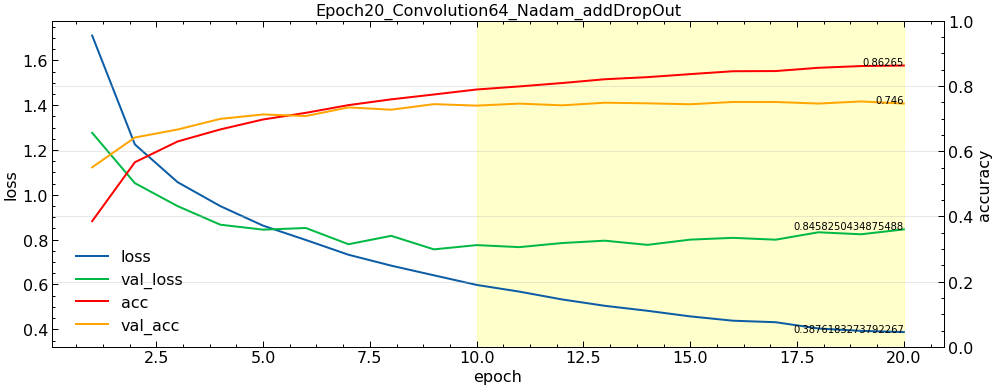

In [28]:
# show
show_result(model)
plot_score(Score(trainer.label,trainer.label + ".csv"))

In [29]:
label = 'Epoch20_Convolution64_Nadam_addDropOut_batch256'
# train
model = network_Conv64_addDO(dataset.image_shape, dataset.num_classes)
trainer = Trainer(model, loss="categorical_crossentropy", optimizer=Nadam(), label=label)
trainer.train(
    x_train, y_train, batch_size=256, epochs=20, validation_split=0.2
    )

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 90s 2ms/step - loss: 1.8489 - acc: 0.3346 - val_loss: 1.4358 - val_acc: 0.4903
Epoch 2/20
40000/40000 [==============================] - 88s 2ms/step - loss: 1.3396 - acc: 0.5263 - val_loss: 1.2959 - val_acc: 0.5321
Epoch 3/20
40000/40000 [==============================] - 88s 2ms/step - loss: 1.1485 - acc: 0.5933 - val_loss: 1.1254 - val_acc: 0.6087
Epoch 4/20
40000/40000 [==============================] - 88s 2ms/step - loss: 1.0147 - acc: 0.6441 - val_loss: 0.9498 - val_acc: 0.6675
Epoch 5/20
40000/40000 [==============================] - 88s 2ms/step - loss: 0.9179 - acc: 0.6754 - val_loss: 0.9789 - val_acc: 0.6625
Epoch 6/20
40000/40000 [==============================] - 88s 2ms/step - loss: 0.8394 - acc: 0.7058 - val_loss: 0.8584 - val_acc: 0.7025
Epoch 7/20
40000/40000 [==============================] - 88s 2ms/step - loss: 0.7637 - acc: 0.7292 - val_loss: 0.9150 - val_acc

Test loss: 0.864669437789917
Test accuracy: 0.7405


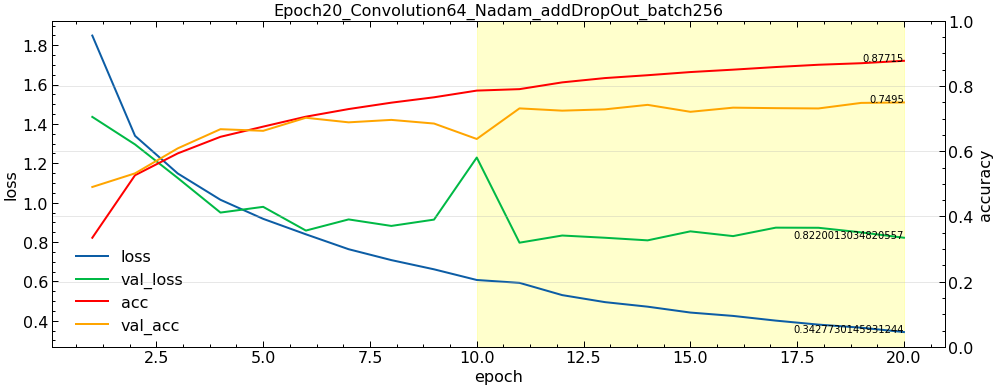

In [30]:
# show
show_result(model)
plot_score(Score(trainer.label,trainer.label + ".csv"))

In [31]:
label = 'Epoch20_AddConv_Nadam_addDropOut_batch512'
# train
model = network_addConv_addDO(dataset.image_shape, dataset.num_classes)
trainer = Trainer(model, loss="categorical_crossentropy", optimizer=Nadam(), label=label)
trainer.train(
    x_train, y_train, batch_size=512, epochs=20, validation_split=0.2
    )

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 93s 2ms/step - loss: 2.1792 - acc: 0.2160 - val_loss: 2.3418 - val_acc: 0.2317
Epoch 2/20
40000/40000 [==============================] - 92s 2ms/step - loss: 1.7390 - acc: 0.3691 - val_loss: 1.6229 - val_acc: 0.3857
Epoch 3/20
40000/40000 [==============================] - 92s 2ms/step - loss: 1.4948 - acc: 0.4604 - val_loss: 1.7112 - val_acc: 0.4168
Epoch 4/20
40000/40000 [==============================] - 92s 2ms/step - loss: 1.3487 - acc: 0.5181 - val_loss: 1.2670 - val_acc: 0.5502
Epoch 5/20
40000/40000 [==============================] - 92s 2ms/step - loss: 1.2046 - acc: 0.5719 - val_loss: 1.3930 - val_acc: 0.4942
Epoch 6/20
40000/40000 [==============================] - 92s 2ms/step - loss: 1.0937 - acc: 0.6126 - val_loss: 1.0674 - val_acc: 0.6245
Epoch 7/20
40000/40000 [==============================] - 92s 2ms/step - loss: 0.9906 - acc: 0.6517 - val_loss: 0.9317 - val_acc

Test loss: 0.9176516547203064
Test accuracy: 0.7197


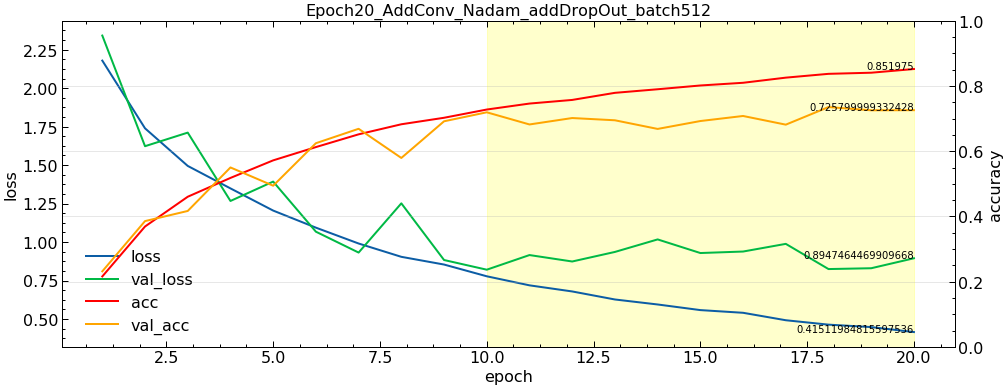

In [32]:
# show
show_result(model)
plot_score(Score(trainer.label,trainer.label + ".csv"))

In [33]:
label = 'Epoch20_AddConv_Nadam_addDropOut_batch512'
# train
model = network_addConv_addDO(dataset.image_shape, dataset.num_classes)
trainer = Trainer(model, loss="categorical_crossentropy", optimizer=Nadam(), label=label)
trainer.train(
    x_train, y_train, batch_size=512, epochs=20, validation_split=0.2
    )

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 93s 2ms/step - loss: 2.0962 - acc: 0.2495 - val_loss: 2.2790 - val_acc: 0.2333
Epoch 2/20
40000/40000 [==============================] - 93s 2ms/step - loss: 1.6330 - acc: 0.4084 - val_loss: 1.4782 - val_acc: 0.4721
Epoch 3/20
40000/40000 [==============================] - 92s 2ms/step - loss: 1.4835 - acc: 0.4662 - val_loss: 1.5100 - val_acc: 0.4596
Epoch 4/20
40000/40000 [==============================] - 92s 2ms/step - loss: 1.3163 - acc: 0.5266 - val_loss: 1.2595 - val_acc: 0.5462
Epoch 5/20
40000/40000 [==============================] - 92s 2ms/step - loss: 1.1751 - acc: 0.5821 - val_loss: 1.2190 - val_acc: 0.5700
Epoch 6/20
40000/40000 [==============================] - 93s 2ms/step - loss: 1.0749 - acc: 0.6221 - val_loss: 1.7322 - val_acc: 0.4433
Epoch 7/20
40000/40000 [==============================] - 92s 2ms/step - loss: 1.2182 - acc: 0.5750 - val_loss: 1.2364 - val_acc

Test loss: 0.9832295806884765
Test accuracy: 0.7122


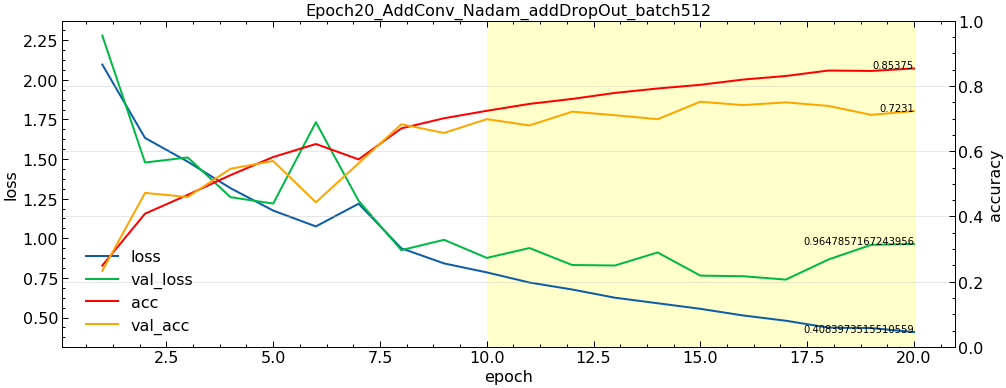

In [34]:
# show
show_result(model)
plot_score(Score(trainer.label,trainer.label + ".csv"))